In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('advertising.csv')


In [5]:
x=df['TV']
y=df['Sales']
xc=sm.add_constant(x)

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=10,test_size=.20)

In [8]:
from statsmodels.api import OLS

In [14]:
model12=OLS(ytrain,xtrain)
model12=model12.fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     664.5
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.76e-58
Time:                        16:09:11   Log-Likelihood:                -351.10
No. Observations:                 160   AIC:                             706.2
Df Residuals:                     158   BIC:                             712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9948      0.353     19.804      0.0

In [15]:
print(model12.conf_int)

print(model12.bse)

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E2437FAA10>>
const    0.353206
TV       0.002123
dtype: float64


<Axes: xlabel='TV', ylabel='Sales'>

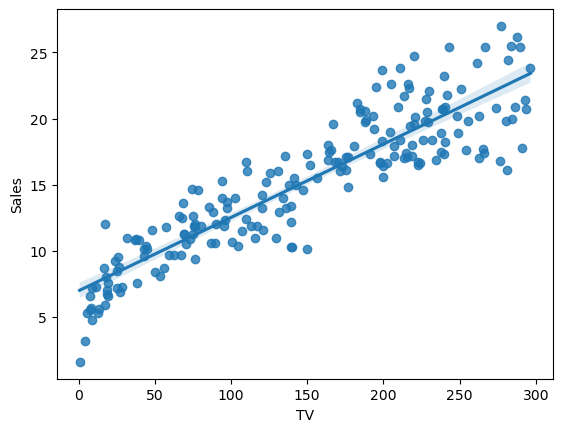

In [17]:
sns.regplot(x=x,y=y)

In [18]:
ypred=model12.predict(xtest)

In [28]:
ssr=np.sum((ypred-ytest.mean())**2)

sse=np.sum((ytest-ypred)**2)

print(ssr)
print(sse)
sst=ssr+sse
print('sst:',sst)

1218.4192022002967
291.496142324697
sst: 1509.9153445249938


In [31]:
r_sq=ssr/sst
print('r_sq:',r_sq)

r_sq: 0.8069453738703481


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error



In [35]:
rmse=np.sqrt(mean_squared_error(ytest,ypred))
rmse

2.6995191346085003

In [38]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [40]:
xc=sm.add_constant(x)

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=.2,random_state=10)

In [48]:
from statsmodels.api import OLS

model21=sm.OLS(ytrain,xtrain)
model21=model21.fit()
print(model21.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     507.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           3.10e-80
Time:                        16:35:51   Log-Likelihood:                -292.99
No. Observations:                 160   AIC:                             594.0
Df Residuals:                     156   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7931      0.317     15.110      0.0

In [50]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


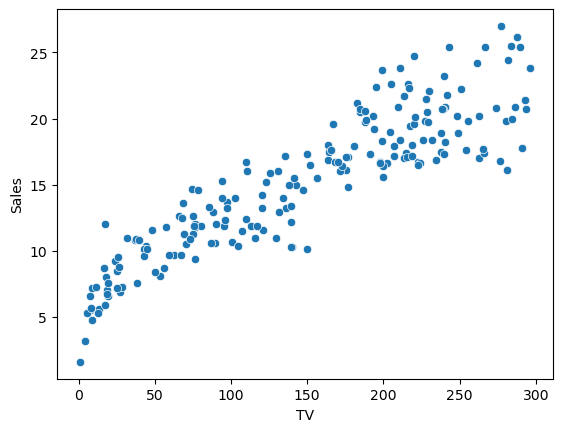

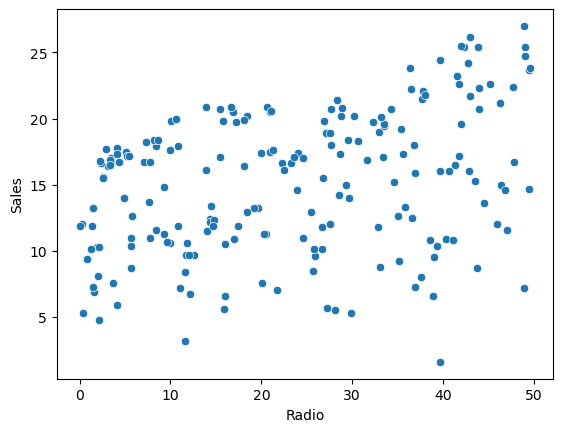

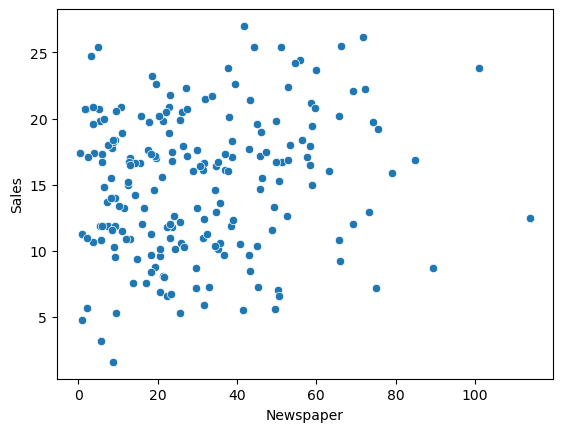

In [58]:
import  matplotlib.pyplot as plt
for col in x:
    sns.scatterplot(x=x[col],y=df['Sales'])
    plt.show()
    


In [61]:
#leniear rainbow test

from statsmodels.stats.diagnostic import linear_rainbow
a,b=linear_rainbow(model12,frac=.5)
print(a,b)

0.899234312514565 0.6813339070657192


In [72]:
#multicolinearrity
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif=pd.DataFrame()
vif['vif']=[VIF(x.values,i) for i in range(x.shape[1])]
vif['feat']=x.columns
vif

,vif,feat
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper
